# Read the data
https://lobsterdata.com/info/DataSamples.php

variable explanation.

Time: Seconds after midnight with decimal precision of at least milliseconds and up to nanoseconds depending on the period requested
Event Type:
1: Submission of a new limit order
2: Cancellation (partial deletion of a limit order)
3: Deletion (total deletion of a limit order)
4: Execution of a visible limit order
5: Execution of a hidden limit order
6: Indicates a cross trade, e.g. auction trade
7: Trading halt indicator (detailed information below)
Order ID: Unique order reference number
Size: Number of shares
Price: Dollar price times 10000 (i.e. a stock price of $91.14 is given by 911400)
Direction:
-1: Sell limit order
1: Buy limit order
Note: Execution of a sell (buy) limit order corresponds to a buyer (seller) initiated trade, i.e. buy (sell) trade.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

orderbook = "data/GOOG_2012-06-21_34200000_57600000_orderbook_10.csv"
message = "data/GOOG_2012-06-21_34200000_57600000_message_10.csv"

df_message = pd.read_csv(message,usecols = [0,1,3,4,5], names=['time', 'type','size','price','direction'])
df_message.head()
df_message.index = pd.Timestamp(datetime.date.today()) + pd.TimedeltaIndex(df_message.time, unit='s')
df_message.to_csv("tick.csv")

In [ ]:
############################
############################
############################
## tick level statistics
############################
############################
############################

In [3]:
# On order type: order to trade ratio: 10 to 1
df_message.groupby("type").count()[["time"]]

,time
type,
1,158155
2,23
3,152562
4,9022
5,5207
6,1


In [6]:
# orders by mins
df_message.groupby("type").count()[['time']]/6.5/60

,time
type,
1,405.525641
2,0.058974
3,391.184615
4,23.133333
5,13.351282
6,0.002564


# limit order dynamics


In [9]:
### limit order dynamics
df_lo = df_message[df_message['type'] == 1]
df_lo.groupby('direction').agg({"time":"count","size":"sum"}).rename(columns={"time":"count"})

,count,size
direction,,
-1,94981,3804438
1,63174,2622967


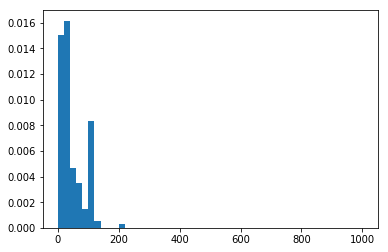

,size
count,63174.000000
mean,41.519723
std,64.913328
min,1.000000
25%,10.000000
50%,26.000000
75%,70.000000
max,5000.000000


In [12]:
df_lo_bid = df_lo[df_lo['direction'] ==1]
plt.hist(df_lo_bid['size'], 50, normed=True, range=[0, 1000])
plt.show()

# limit bid (buy) order 
df_lo_bid.describe()[["size"]]

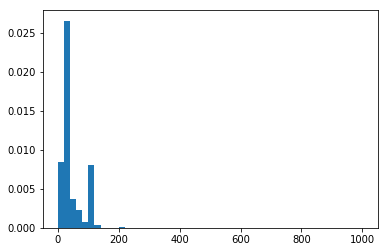

,size
count,94981.000000
mean,40.054727
std,35.443769
min,1.000000
25%,25.000000
50%,25.000000
75%,52.000000
max,1100.000000


In [14]:
df_lo_ask = df_lo[df_lo['direction'] == -1]
plt.hist(df_lo_ask['size'], 50, normed=True, range=[0, 1000])
plt.show()

# limit ask order 
df_lo_ask.describe()[["size"]]

# Trades

In [15]:
# Trades
df_trade = df_message[(df_message['type'] == 4) | (df_message['type'] == 5)] 
df_trade.to_csv('trade.csv')

In [35]:
# trading direction
df_trade.head(100)

,time,type,size,price,direction,return
2019-12-10 09:30:00.001513,34200.001513,4,1,11165500,1,0.0
2019-12-10 09:30:00.006005,34200.006005,4,1,11165500,1,0.0
2019-12-10 09:30:00.028326,34200.028326,4,27,11165500,1,0.0
2019-12-10 09:30:00.028326,34200.028326,4,4,11165500,1,0.0
2019-12-10 09:30:00.028977,34200.028977,4,26,11165500,1,0.0
2019-12-10 09:30:00.077417,34200.077417,4,34,11165500,1,0.0
2019-12-10 09:30:00.164388,34200.164388,4,36,11165500,1,0.0
2019-12-10 09:30:00.164388,34200.164388,4,34,11165500,1,0.0
2019-12-10 09:30:00.171283,34200.171283,4,1,11165500,1,0.0
2019-12-10 09:30:00.176522,34200.176522,4,65,11165500,1,0.0


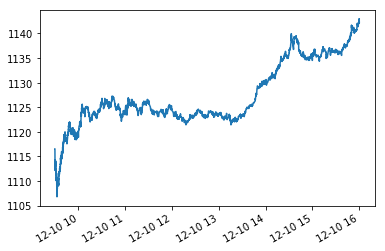

In [36]:
(df_trade['price']/10000).plot()
plt.show()

In [ ]:
df_trade['return'] = (df_trade['price'].shift(-1)) - (df_trade['price'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


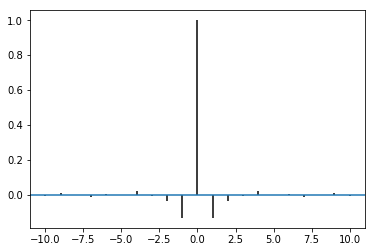

In [34]:
df_trade['return'].autocorr()
df_trade.dropna(inplace=True)
plt.acorr(df_trade['return'])
plt.show()

In [33]:
df_trade.groupby("direction").agg({"time":"count","size":"sum"})

,time,size
direction,,
-1,4651,117159
1,9577,198801


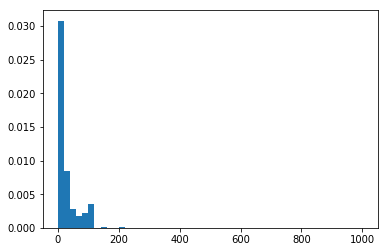

In [60]:
df_trade_bid = df_trade[df_trade['direction'] == -1]
plt.hist(df_trade_bid['size'], 50, normed=True, range=[0, 1000])
plt.show()

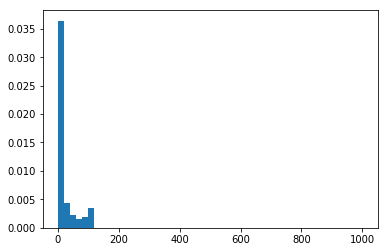

In [61]:
df_trade_ask = df_trade[df_trade['direction'] == 1]
plt.hist(df_trade_ask['size'], 50, normed=True, range=[0, 1000])
plt.show()

# re-sampling

In [111]:
message1m = df_message.resample('1min').last()
message1m.to_csv('1min.csv')
# message1s.shape
message1m['logreturn'] = np.log(message1m['price'].shift(-1)) - np.log(message1m['price'])
message1m['return'] = (message1m['price'].shift(-1)) - (message1m['price'])
message1m.dropna(inplace=True)

In [112]:
message1m.tail()

,time,type,size,price,direction,logreturn,return
2019-12-06 15:54:00,57299.810295,1,25,11407700,-1,-0.000342,-3900.0
2019-12-06 15:55:00,57359.872085,3,1,11403800,1,-0.000009,-100.0
2019-12-06 15:56:00,57419.961981,1,31,11403700,1,0.001288,14700.0
2019-12-06 15:57:00,57479.753006,1,100,11418400,-1,-0.000158,-1800.0
2019-12-06 15:58:00,57539.625580,1,1,11416600,1,0.000175,2000.0


In [ ]:
def trade_sample(df_message = df_message, freq='1MIN'):
    trade_sampled = df_message.resample(freq).last()
    trade_sampled['logreturn'] = np.log(trade_sampled['price'].shift(-1)) - np.log(trade_sampled['price'])
    trade_sampled['return'] = (trade_sampled['price'].shift(-1)) - (trade_sampled['price'])
    trade_sampled.dropna(inplace=True)
    return trade_sampled 

In [129]:
trade_sample(freq='4MIN')['return'].std()

16045.79866005975

In [131]:
trade_sample(freq='81MIN')['return'].std()

61183.87587156167

In [130]:
trade_sample(freq='1MIN')['return'].std()

12547.92347958779

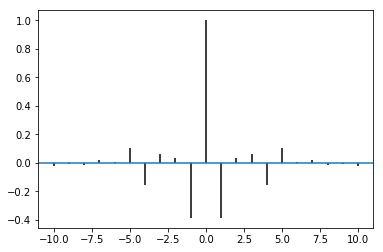

In [132]:
plt.acorr(trade_sample(freq='1MIN')['return'])
plt.show()

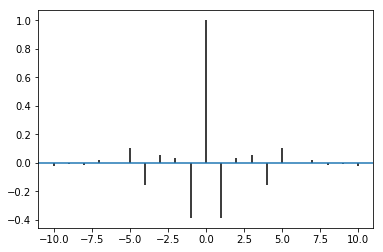

In [115]:
plt.acorr(trade_sampled['logreturn'])
plt.show()